## Libraries

In [71]:
import albumentations as A
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from pathlib import Path

from sklearn.model_selection import KFold

pd.set_option("max_rows", 150)

## Path

In [2]:
img_dir = Path("../input/bengaliai-cv19/train_images/")
img_paths = list(img_dir.glob("*.png"))

train_df = pd.read_csv("../input/bengaliai-cv19/train.csv")

img_paths[:5]

[PosixPath('../input/bengaliai-cv19/train_images/Train_186534.png'),
 PosixPath('../input/bengaliai-cv19/train_images/Train_78566.png'),
 PosixPath('../input/bengaliai-cv19/train_images/Train_57585.png'),
 PosixPath('../input/bengaliai-cv19/train_images/Train_152003.png'),
 PosixPath('../input/bengaliai-cv19/train_images/Train_114056.png')]

../input/bengaliai-cv19/train_images/Train_60329.png


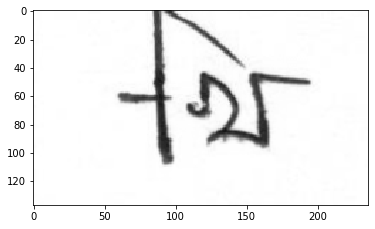

In [3]:
idx = 5
print(str(img_paths[idx]))
img = cv2.imread(str(img_paths[idx]))
plt.imshow(img);

In [4]:
train_df.head()

,image_id,grapheme_root,vowel_diacritic,consonant_diacritic,grapheme
0,Train_0,15,9,5,ক্ট্রো
1,Train_1,159,0,0,হ
2,Train_2,22,3,5,খ্রী
3,Train_3,53,2,2,র্টি
4,Train_4,71,9,5,থ্রো


In [5]:
cls_map = pd.read_csv("../input/bengaliai-cv19/class_map.csv")
cls_map.head()

,component_type,label,component
0,grapheme_root,0,ং
1,grapheme_root,1,ঃ
2,grapheme_root,2,অ
3,grapheme_root,3,আ
4,grapheme_root,4,ই


In [41]:
cls_map

,component_type,label,component
0,grapheme_root,0,ং
1,grapheme_root,1,ঃ
2,grapheme_root,2,অ
3,grapheme_root,3,আ
4,grapheme_root,4,ই
...,...,...,...
181,consonant_diacritic,2,র্
182,consonant_diacritic,3,র্য
183,consonant_diacritic,4,্য
184,consonant_diacritic,5,্র


## Check each grapheme

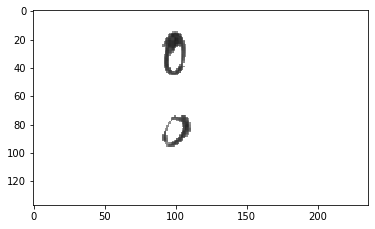

In [50]:
idx = 111
grapheme = 1
grapheme = train_df.query(f"grapheme_root == {grapheme}")
img = cv2.imread(str(img_dir / f'{grapheme.iloc[idx, 0]}.png'))
img[img > 150] = 255
plt.imshow(img);

(0, 20000)

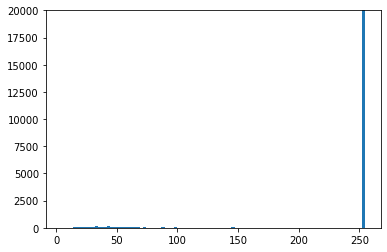

In [36]:
plt.hist(img.reshape(-1), bins=100)
plt.ylim(0, 20000)

## Check preds

In [62]:
preds = np.load("../output/se_resnext.100epoch.size128/oof_preds.npy")
kf = KFold(random_state=42, n_splits=5, shuffle=True)
splits = list(kf.split(train_df))
val_idx = splits[0][1]
val_preds = preds[val_idx]

In [63]:
val_gt = train_df.loc[val_idx, :]

In [64]:
val_preds

array([[ 71.,   9.,   5.],
       [ 52.,   2.,   0.],
       [ 74.,   1.,   2.],
       ...,
       [ 58.,   9.,   0.],
       [ 65.,   9.,   0.],
       [152.,   9.,   0.]])

In [65]:
val_gt.head()

,image_id,grapheme_root,vowel_diacritic,consonant_diacritic,grapheme
4,Train_4,71,9,5,থ্রো
6,Train_6,52,2,0,ঞ্জি
12,Train_12,74,1,2,র্দ্দা
22,Train_22,53,4,5,ট্রু
31,Train_31,99,1,0,প্না


In [66]:
grapheme_preds = val_preds[:, 0]
grapheme_gt = val_gt["grapheme_root"].values
grapheme_df = pd.DataFrame({
    "preds": grapheme_preds,
    "gt": grapheme_gt
})
grapheme_df.head()

,preds,gt
0,71.0,71
1,52.0,52
2,74.0,74
3,53.0,53
4,99.0,99


In [68]:
grapheme_failure = grapheme_df.query("preds != gt")

In [72]:
grapheme_failure["gt"].value_counts()

62     43
147    43
96     39
122    36
81     30
113    28
115    26
53     25
120    24
71     24
29     24
107    23
13     22
56     22
64     22
59     22
22     21
133    21
23     21
86     18
141    18
32     17
72     17
89     16
61     16
60     16
54     16
148    15
43     14
139    14
55     14
153    14
85     13
94     13
152    13
76     13
79     13
156    12
117    12
95     12
18     12
103    11
91     11
58     11
25     10
84     10
116    10
118    10
67     10
144    10
142    10
135    10
83     10
31      9
38      9
167     9
150     9
68      8
149     8
162     8
28      8
92      8
37      8
52      8
128     7
159     7
75      7
57      7
123     7
136     6
140     6
145     6
70      6
151     6
109     6
119     5
16      5
111     5
154     5
30      5
98      5
99      5
65      5
101     5
42      5
44      4
137     4
20      4
165     4
9       4
106     4
93      4
121     4
6       4
143     3
27      3
108     3
17      3
69      3
48      3


In [80]:
grapheme_failure.query("gt == 1")

,preds,gt
13021,100.0,1


In [74]:
cls_map.query("component_type == 'grapheme_root' & label == 62")

,component_type,label,component
62,grapheme_root,62,ণ্ড


In [81]:
cls_map.query("component_type == 'grapheme_root' & label == 100")

,component_type,label,component
100,grapheme_root,100,প্প
